# Utilizing a comprehensive COVID-19 dataset spanning from 2020 to 2023, Multiple Linear Regression (MLR) algorithm is employed to construct a predictive model for death, considering a multitude of variables.

# DATA WRANGLING PROCESS

In [1]:
import numpy as np
import pandas as pd
#import pandas_profiling as pp
import ydata_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
%matplotlib inline 
#to execute method in library although version not updated

In [2]:
CovidDeaths = pd.read_csv('CovidDeaths.csv')
CovidDeaths.describe()

C:\Users\dausy\AppData\Local\Temp\ipykernel_20160\3021864066.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  CovidDeaths = pd.read_csv('CovidDeaths.csv')


,population,total_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
count,3.080070e+05,2.719050e+05,2.979340e+05,2.513450e+05,299296.000000,298066.000000,271905.000000,299198.000000,297934.000000,251345.000000,...,298066.000000,184817.000000,35824.000000,35824.000000,36597.000000,36597.000000,9380.000000,9380.000000,21743.000000,21743.000000
mean,1.283649e+08,5.673000e+06,1.088439e+04,8.006052e+04,96.684450,97.062506,86607.845076,163.357032,164.021170,804.720451,...,1.029812,0.911495,703.719043,17.014529,4099.607454,139.884563,366.984542,11.116090,4514.205859,91.622239
std,6.605217e+08,3.547996e+07,1.008186e+05,4.139807e+05,603.883003,594.584136,136982.850880,1131.843555,637.665695,1048.822115,...,2.928386,0.399925,2224.458299,23.372177,10257.847760,157.095870,541.479589,14.142833,11380.778503,90.856741
min,4.700000e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.490020e+05,6.444000e+03,1.143000e+00,1.200000e+02,0.000000,0.000000,1991.558000,0.000000,0.263000,48.978000,...,0.000000,0.720000,24.000000,2.933000,230.000000,37.267000,28.000000,2.416250,280.000000,29.313000
50%,5.882259e+06,6.174500e+04,3.871400e+01,1.218000e+03,0.000000,0.286000,20332.474000,2.517000,10.966000,333.485000,...,0.034000,0.950000,105.000000,7.629000,807.000000,87.633000,132.000000,5.921000,939.000000,66.670000
75%,2.830170e+07,6.331670e+05,6.394290e+02,1.050400e+04,6.000000,6.714000,105419.525000,70.270500,105.365000,1236.212000,...,0.770000,1.140000,460.000000,21.441000,3171.000000,183.723000,477.000000,14.395500,4246.500000,123.608500
max,7.975105e+09,7.652222e+08,6.410719e+06,6.921601e+06,20042.000000,14675.571000,734871.491000,228872.025000,37241.781000,6464.748000,...,148.641000,5.870000,28891.000000,180.675000,154497.000000,1526.846000,4838.000000,224.976000,153977.000000,708.310000


In [3]:
CovidDeaths.tail()

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
308002,ZWE,Africa,Zimbabwe,29/4/2023,16320539,264679.0,16.0,6.714,5685.0,0.0,...,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308003,ZWE,Africa,Zimbabwe,30/4/2023,16320539,264683.0,4.0,6.571,5686.0,1.0,...,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308004,ZWE,Africa,Zimbabwe,1/5/2023,16320539,264685.0,2.0,6.571,5686.0,0.0,...,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308005,ZWE,Africa,Zimbabwe,2/5/2023,16320539,264685.0,0.0,6.000,5686.0,0.0,...,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308006,ZWE,Africa,Zimbabwe,3/5/2023,16320539,264685.0,0.0,5.857,5686.0,0.0,...,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Filtering dataframe into Malaysian Country only

In [4]:
CovidDeaths = CovidDeaths[(CovidDeaths['location']=='Malaysia')] 
CovidDeaths

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
161452,MYS,Asia,Malaysia,3/1/2020,33938216,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161453,MYS,Asia,Malaysia,4/1/2020,33938216,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161454,MYS,Asia,Malaysia,5/1/2020,33938216,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161455,MYS,Asia,Malaysia,6/1/2020,33938216,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161456,MYS,Asia,Malaysia,7/1/2020,33938216,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162669,MYS,Asia,Malaysia,4/5/2023,33938216,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,43.0,1.267,774.0,22.806,NaN,NaN,1665.0,49.060
162670,MYS,Asia,Malaysia,5/5/2023,33938216,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,44.0,1.296,762.0,22.453,NaN,NaN,1658.0,48.853
162671,MYS,Asia,Malaysia,6/5/2023,33938216,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,41.0,1.208,766.0,22.570,NaN,NaN,1672.0,49.266
162672,MYS,Asia,Malaysia,7/5/2023,33938216,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
CovidDeaths.describe()

,population,total_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
count,1222.0,1.194000e+03,1210.000000,1143.000000,1217.000000,1212.000000,1194.000000,1215.000000,1210.000000,1143.000000,...,1212.000000,1029.000000,1139.000000,1139.000000,1139.000000,1139.000000,0.0,0.0,1133.000000,1133.000000
mean,33938216.0,2.221174e+06,4188.656336,19028.132108,30.419063,30.541380,65447.586225,122.998619,123.420048,560.669788,...,0.899902,1.044208,282.170325,8.314241,2769.296752,81.598185,NaN,NaN,3675.713151,108.306016
std,0.0,2.083661e+06,6308.124403,16503.566664,68.439252,66.375743,61395.722133,187.660830,185.870829,486.282669,...,1.955783,0.273341,399.724115,11.777988,3278.015794,96.587744,NaN,NaN,4006.338005,118.047999
min,33938216.0,4.000000e+00,0.000000,2.000000,0.000000,0.000000,0.118000,0.000000,0.000000,0.059000,...,0.000000,0.510000,0.000000,0.000000,39.000000,1.149000,NaN,NaN,27.000000,0.796000
25%,33938216.0,5.071250e+04,213.142750,451.500000,0.000000,1.143000,1494.259500,4.464000,6.280250,13.303500,...,0.034000,0.880000,29.000000,0.854000,485.000000,14.291000,NaN,NaN,744.000000,21.922000
50%,33938216.0,2.003606e+06,1905.500000,27265.000000,5.000000,4.857000,59036.854000,55.660000,56.146000,803.372000,...,0.143000,1.010000,96.000000,2.829000,1501.000000,44.227000,NaN,NaN,2384.000000,70.245000
75%,33938216.0,4.592010e+06,4460.857250,35888.000000,19.000000,19.643250,135304.997750,138.663500,131.440750,1057.451000,...,0.578500,1.160000,351.000000,10.342000,3823.500000,112.661000,NaN,NaN,4740.000000,139.666000
max,33938216.0,5.071840e+06,30729.857000,37020.000000,592.000000,416.571000,149443.330000,984.318000,905.465000,1090.806000,...,12.274000,2.540000,1593.000000,46.938000,14753.000000,434.702000,NaN,NaN,16562.000000,488.004000


In [6]:
CovidDeathsNew = CovidDeaths.drop(CovidDeaths.columns[0:3],axis=1)

In [7]:
CovidDeathsNew

,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
161452,3/1/2020,33938216,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161453,4/1/2020,33938216,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161454,5/1/2020,33938216,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161455,6/1/2020,33938216,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161456,7/1/2020,33938216,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162669,4/5/2023,33938216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,43.0,1.267,774.0,22.806,NaN,NaN,1665.0,49.060
162670,5/5/2023,33938216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,44.0,1.296,762.0,22.453,NaN,NaN,1658.0,48.853
162671,6/5/2023,33938216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,41.0,1.208,766.0,22.570,NaN,NaN,1672.0,49.266
162672,7/5/2023,33938216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
profile = pp.ProfileReport(CovidDeathsNew)
profile.to_file("CovidDeathsNew.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# CHECKING NULL DATA AND TREATING MISSING VALUE

In [9]:
CovidDeathsNew.isnull().sum()

date                                     0
population                               0
total_cases                             28
new_cases                                7
new_cases_smoothed                      12
total_deaths                            79
new_deaths                               5
new_deaths_smoothed                     10
total_cases_per_million                 28
new_cases_per_million                    7
new_cases_smoothed_per_million          12
total_deaths_per_million                79
new_deaths_per_million                   5
new_deaths_smoothed_per_million         10
reproduction_rate                      193
icu_patients                            83
icu_patients_per_million                83
hosp_patients                           83
hosp_patients_per_million               83
weekly_icu_admissions                 1222
weekly_icu_admissions_per_million     1222
weekly_hosp_admissions                  89
weekly_hosp_admissions_per_million      89
dtype: int6

In [10]:
#Notice that all row in weekly_icu_admissions is Null
#remove all row related to that column
CovidDeathsNew = CovidDeathsNew.drop(columns=['weekly_icu_admissions', 'weekly_icu_admissions_per_million'])


In [11]:
CovidDeathsNew.isnull().sum()

date                                    0
population                              0
total_cases                            28
new_cases                               7
new_cases_smoothed                     12
total_deaths                           79
new_deaths                              5
new_deaths_smoothed                    10
total_cases_per_million                28
new_cases_per_million                   7
new_cases_smoothed_per_million         12
total_deaths_per_million               79
new_deaths_per_million                  5
new_deaths_smoothed_per_million        10
reproduction_rate                     193
icu_patients                           83
icu_patients_per_million               83
hosp_patients                          83
hosp_patients_per_million              83
weekly_hosp_admissions                 89
weekly_hosp_admissions_per_million     89
dtype: int64

In [12]:
#Locate the row of Missing Values
trace_missing_total_cases = pd.isnull(CovidDeathsNew['total_cases'])
CovidDeathsNew[trace_missing_total_cases]

,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
161452,3/1/2020,33938216,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161453,4/1/2020,33938216,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161454,5/1/2020,33938216,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161455,6/1/2020,33938216,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161456,7/1/2020,33938216,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161457,8/1/2020,33938216,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161458,9/1/2020,33938216,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161459,10/1/2020,33938216,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161460,11/1/2020,33938216,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161461,12/1/2020,33938216,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Replace with zero
CovidDeathsNew.total_cases = CovidDeathsNew.total_cases.fillna(0) #By Column

In [14]:
CovidDeathsNew.isnull().sum()

date                                    0
population                              0
total_cases                             0
new_cases                               7
new_cases_smoothed                     12
total_deaths                           79
new_deaths                              5
new_deaths_smoothed                    10
total_cases_per_million                28
new_cases_per_million                   7
new_cases_smoothed_per_million         12
total_deaths_per_million               79
new_deaths_per_million                  5
new_deaths_smoothed_per_million        10
reproduction_rate                     193
icu_patients                           83
icu_patients_per_million               83
hosp_patients                          83
hosp_patients_per_million              83
weekly_hosp_admissions                 89
weekly_hosp_admissions_per_million     89
dtype: int64

In [15]:
#Locate the row of Missing Values
trace_missing_new_cases = pd.isnull(CovidDeathsNew['new_cases'])
CovidDeathsNew[trace_missing_new_cases]

,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
162667,2/5/2023,33938216,5071840.0,NaN,NaN,37020.0,0.0,1.286,149443.33,NaN,...,1090.806,0.0,0.038,NaN,41.0,1.208,725.0,21.362,1538.0,45.318
162668,3/5/2023,33938216,5071840.0,NaN,NaN,37020.0,0.0,1.286,149443.33,NaN,...,1090.806,0.0,0.038,NaN,44.0,1.296,772.0,22.747,1593.0,46.938
162669,4/5/2023,33938216,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,43.0,1.267,774.0,22.806,1665.0,49.060
162670,5/5/2023,33938216,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,44.0,1.296,762.0,22.453,1658.0,48.853
162671,6/5/2023,33938216,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,41.0,1.208,766.0,22.570,1672.0,49.266
162672,7/5/2023,33938216,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162673,8/5/2023,33938216,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Replace with zero
CovidDeathsNew.new_cases = CovidDeathsNew.new_cases.fillna(0) #By Column

In [17]:
CovidDeathsNew.isnull().sum()

date                                    0
population                              0
total_cases                             0
new_cases                               0
new_cases_smoothed                     12
total_deaths                           79
new_deaths                              5
new_deaths_smoothed                    10
total_cases_per_million                28
new_cases_per_million                   7
new_cases_smoothed_per_million         12
total_deaths_per_million               79
new_deaths_per_million                  5
new_deaths_smoothed_per_million        10
reproduction_rate                     193
icu_patients                           83
icu_patients_per_million               83
hosp_patients                          83
hosp_patients_per_million              83
weekly_hosp_admissions                 89
weekly_hosp_admissions_per_million     89
dtype: int64

In [18]:
#Locate the row of Missing Values
trace_missing_new_cases_smoothed = pd.isnull(CovidDeathsNew['new_cases_smoothed'])
CovidDeathsNew[trace_missing_new_cases_smoothed]

,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
161452,3/1/2020,33938216,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161453,4/1/2020,33938216,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161454,5/1/2020,33938216,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161455,6/1/2020,33938216,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161456,7/1/2020,33938216,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162667,2/5/2023,33938216,5071840.0,0.0,NaN,37020.0,0.0,1.286,149443.33,NaN,...,1090.806,0.0,0.038,NaN,41.0,1.208,725.0,21.362,1538.0,45.318
162668,3/5/2023,33938216,5071840.0,0.0,NaN,37020.0,0.0,1.286,149443.33,NaN,...,1090.806,0.0,0.038,NaN,44.0,1.296,772.0,22.747,1593.0,46.938
162669,4/5/2023,33938216,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,43.0,1.267,774.0,22.806,1665.0,49.060
162670,5/5/2023,33938216,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,44.0,1.296,762.0,22.453,1658.0,48.853
162671,6/5/2023,33938216,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,41.0,1.208,766.0,22.570,1672.0,49.266


In [19]:
#Replace with zero
CovidDeathsNew.new_cases_smoothed = CovidDeathsNew.new_cases_smoothed.fillna(0) #By Column

In [20]:
CovidDeathsNew.isnull().sum()

date                                    0
population                              0
total_cases                             0
new_cases                               0
new_cases_smoothed                      0
total_deaths                           79
new_deaths                              5
new_deaths_smoothed                    10
total_cases_per_million                28
new_cases_per_million                   7
new_cases_smoothed_per_million         12
total_deaths_per_million               79
new_deaths_per_million                  5
new_deaths_smoothed_per_million        10
reproduction_rate                     193
icu_patients                           83
icu_patients_per_million               83
hosp_patients                          83
hosp_patients_per_million              83
weekly_hosp_admissions                 89
weekly_hosp_admissions_per_million     89
dtype: int64

In [21]:
CovidDeathsNew.tail(10)

,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
162664,29/4/2023,33938216,5066877.0,0.0,688.143,37011.0,0.0,1.571,149297.093,0.000,...,1090.541,0.000,0.046,NaN,29.0,0.854,673.0,19.830,1194.0,35.182
162665,30/4/2023,33938216,5071694.0,4817.0,688.143,37020.0,9.0,2.857,149439.028,141.934,...,1090.806,0.265,0.084,NaN,64.0,1.886,737.0,21.716,1345.0,39.631
162666,1/5/2023,33938216,5071840.0,146.0,709.000,37020.0,0.0,1.286,149443.330,4.302,...,1090.806,0.000,0.038,NaN,41.0,1.208,767.0,22.600,1462.0,43.078
162667,2/5/2023,33938216,5071840.0,0.0,0.000,37020.0,0.0,1.286,149443.330,NaN,...,1090.806,0.000,0.038,NaN,41.0,1.208,725.0,21.362,1538.0,45.318
162668,3/5/2023,33938216,5071840.0,0.0,0.000,37020.0,0.0,1.286,149443.330,NaN,...,1090.806,0.000,0.038,NaN,44.0,1.296,772.0,22.747,1593.0,46.938
162669,4/5/2023,33938216,0.0,0.0,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,43.0,1.267,774.0,22.806,1665.0,49.060
162670,5/5/2023,33938216,0.0,0.0,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,44.0,1.296,762.0,22.453,1658.0,48.853
162671,6/5/2023,33938216,0.0,0.0,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,41.0,1.208,766.0,22.570,1672.0,49.266
162672,7/5/2023,33938216,0.0,0.0,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162673,8/5/2023,33938216,0.0,0.0,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
CovidDeathsNew.drop(CovidDeathsNew.tail(5).index,inplace=True) # drop last n rows

In [23]:
CovidDeathsNew.tail(10)

,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
162659,24/4/2023,33938216,5066877.0,0.0,814.000,37011.0,11.0,2.429,149297.093,0.000,...,1090.541,0.324,0.072,NaN,29.0,0.854,374.0,11.020,849.0,25.016
162660,25/4/2023,33938216,5066877.0,0.0,688.143,37011.0,0.0,1.571,149297.093,0.000,...,1090.541,0.000,0.046,NaN,25.0,0.737,403.0,11.875,850.0,25.046
162661,26/4/2023,33938216,5066877.0,0.0,688.143,37011.0,0.0,1.571,149297.093,0.000,...,1090.541,0.000,0.046,NaN,27.0,0.796,486.0,14.320,920.0,27.108
162662,27/4/2023,33938216,5066877.0,0.0,688.143,37011.0,0.0,1.571,149297.093,0.000,...,1090.541,0.000,0.046,NaN,26.0,0.766,514.0,15.145,977.0,28.788
162663,28/4/2023,33938216,5066877.0,0.0,688.143,37011.0,0.0,1.571,149297.093,0.000,...,1090.541,0.000,0.046,NaN,31.0,0.913,626.0,18.445,1082.0,31.881
162664,29/4/2023,33938216,5066877.0,0.0,688.143,37011.0,0.0,1.571,149297.093,0.000,...,1090.541,0.000,0.046,NaN,29.0,0.854,673.0,19.830,1194.0,35.182
162665,30/4/2023,33938216,5071694.0,4817.0,688.143,37020.0,9.0,2.857,149439.028,141.934,...,1090.806,0.265,0.084,NaN,64.0,1.886,737.0,21.716,1345.0,39.631
162666,1/5/2023,33938216,5071840.0,146.0,709.000,37020.0,0.0,1.286,149443.330,4.302,...,1090.806,0.000,0.038,NaN,41.0,1.208,767.0,22.600,1462.0,43.078
162667,2/5/2023,33938216,5071840.0,0.0,0.000,37020.0,0.0,1.286,149443.330,NaN,...,1090.806,0.000,0.038,NaN,41.0,1.208,725.0,21.362,1538.0,45.318
162668,3/5/2023,33938216,5071840.0,0.0,0.000,37020.0,0.0,1.286,149443.330,NaN,...,1090.806,0.000,0.038,NaN,44.0,1.296,772.0,22.747,1593.0,46.938


In [24]:
CovidDeathsNew.isnull().sum()

date                                    0
population                              0
total_cases                             0
new_cases                               0
new_cases_smoothed                      0
total_deaths                           74
new_deaths                              0
new_deaths_smoothed                     5
total_cases_per_million                23
new_cases_per_million                   2
new_cases_smoothed_per_million          7
total_deaths_per_million               74
new_deaths_per_million                  0
new_deaths_smoothed_per_million         5
reproduction_rate                     188
icu_patients                           81
icu_patients_per_million               81
hosp_patients                          81
hosp_patients_per_million              81
weekly_hosp_admissions                 87
weekly_hosp_admissions_per_million     87
dtype: int64

In [25]:
#Locate the row of Missing Values
trace_missing_total_deaths = pd.isnull(CovidDeathsNew['total_deaths'])
CovidDeathsNew[trace_missing_total_deaths]

,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
161452,3/1/2020,33938216,0.0,0.0,0.000,NaN,0.0,NaN,NaN,0.000,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161453,4/1/2020,33938216,0.0,0.0,0.000,NaN,0.0,NaN,NaN,0.000,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161454,5/1/2020,33938216,0.0,0.0,0.000,NaN,0.0,NaN,NaN,0.000,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161455,6/1/2020,33938216,0.0,0.0,0.000,NaN,0.0,NaN,NaN,0.000,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161456,7/1/2020,33938216,0.0,0.0,0.000,NaN,0.0,NaN,NaN,0.000,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161521,12/3/2020,33938216,149.0,32.0,14.143,NaN,0.0,0.0,4.390,0.943,...,NaN,0.0,0.0,2.16,NaN,NaN,NaN,NaN,NaN,NaN
161522,13/3/2020,33938216,158.0,9.0,14.714,NaN,0.0,0.0,4.656,0.265,...,NaN,0.0,0.0,2.30,NaN,NaN,NaN,NaN,NaN,NaN
161523,14/3/2020,33938216,197.0,39.0,16.286,NaN,0.0,0.0,5.805,1.149,...,NaN,0.0,0.0,2.42,NaN,NaN,NaN,NaN,NaN,NaN
161524,15/3/2020,33938216,238.0,41.0,20.714,NaN,0.0,0.0,7.013,1.208,...,NaN,0.0,0.0,2.54,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#Replace with zero
CovidDeathsNew.total_deaths = CovidDeathsNew.total_deaths.fillna(0) #By Column

In [27]:
CovidDeathsNew.isnull().sum()

date                                    0
population                              0
total_cases                             0
new_cases                               0
new_cases_smoothed                      0
total_deaths                            0
new_deaths                              0
new_deaths_smoothed                     5
total_cases_per_million                23
new_cases_per_million                   2
new_cases_smoothed_per_million          7
total_deaths_per_million               74
new_deaths_per_million                  0
new_deaths_smoothed_per_million         5
reproduction_rate                     188
icu_patients                           81
icu_patients_per_million               81
hosp_patients                          81
hosp_patients_per_million              81
weekly_hosp_admissions                 87
weekly_hosp_admissions_per_million     87
dtype: int64

In [28]:
#Locate the row of Missing Values
trace_missing_new_deaths_smoothed = pd.isnull(CovidDeathsNew['new_deaths_smoothed'])
CovidDeathsNew[trace_missing_new_deaths_smoothed]

,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
161452,3/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161453,4/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161454,5/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161455,6/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161456,7/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Replace with zero
CovidDeathsNew.new_deaths_smoothed = CovidDeathsNew.new_deaths_smoothed.fillna(0) #By Column

In [30]:
CovidDeathsNew.isnull().sum()

date                                    0
population                              0
total_cases                             0
new_cases                               0
new_cases_smoothed                      0
total_deaths                            0
new_deaths                              0
new_deaths_smoothed                     0
total_cases_per_million                23
new_cases_per_million                   2
new_cases_smoothed_per_million          7
total_deaths_per_million               74
new_deaths_per_million                  0
new_deaths_smoothed_per_million         5
reproduction_rate                     188
icu_patients                           81
icu_patients_per_million               81
hosp_patients                          81
hosp_patients_per_million              81
weekly_hosp_admissions                 87
weekly_hosp_admissions_per_million     87
dtype: int64

In [31]:
#Locate the row of Missing Values
trace_missing_reproduction_rate  = pd.isnull(CovidDeathsNew['reproduction_rate'])
CovidDeathsNew[trace_missing_reproduction_rate]

,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
161452,3/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.000,NaN,0.000,...,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161453,4/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.000,NaN,0.000,...,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161454,5/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.000,NaN,0.000,...,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161455,6/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.000,NaN,0.000,...,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161456,7/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.000,NaN,0.000,...,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162664,29/4/2023,33938216,5066877.0,0.0,688.143,37011.0,0.0,1.571,149297.093,0.000,...,1090.541,0.000,0.046,NaN,29.0,0.854,673.0,19.830,1194.0,35.182
162665,30/4/2023,33938216,5071694.0,4817.0,688.143,37020.0,9.0,2.857,149439.028,141.934,...,1090.806,0.265,0.084,NaN,64.0,1.886,737.0,21.716,1345.0,39.631
162666,1/5/2023,33938216,5071840.0,146.0,709.000,37020.0,0.0,1.286,149443.330,4.302,...,1090.806,0.000,0.038,NaN,41.0,1.208,767.0,22.600,1462.0,43.078
162667,2/5/2023,33938216,5071840.0,0.0,0.000,37020.0,0.0,1.286,149443.330,NaN,...,1090.806,0.000,0.038,NaN,41.0,1.208,725.0,21.362,1538.0,45.318


In [32]:
#Replace with mean
CovidDeathsNew.reproduction_rate= CovidDeathsNew.reproduction_rate.fillna(CovidDeathsNew.reproduction_rate.mean())

In [33]:
CovidDeathsNew.isnull().sum()

date                                   0
population                             0
total_cases                            0
new_cases                              0
new_cases_smoothed                     0
total_deaths                           0
new_deaths                             0
new_deaths_smoothed                    0
total_cases_per_million               23
new_cases_per_million                  2
new_cases_smoothed_per_million         7
total_deaths_per_million              74
new_deaths_per_million                 0
new_deaths_smoothed_per_million        5
reproduction_rate                      0
icu_patients                          81
icu_patients_per_million              81
hosp_patients                         81
hosp_patients_per_million             81
weekly_hosp_admissions                87
weekly_hosp_admissions_per_million    87
dtype: int64

In [34]:
#Locate the row of Missing Values
trace_missing_weekly_hosp_admissions = pd.isnull(CovidDeathsNew['weekly_hosp_admissions'])
CovidDeathsNew[trace_missing_weekly_hosp_admissions]

,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
161452,3/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.000,NaN,0.000,...,NaN,0.000,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161453,4/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.000,NaN,0.000,...,NaN,0.000,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161454,5/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.000,NaN,0.000,...,NaN,0.000,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161455,6/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.000,NaN,0.000,...,NaN,0.000,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161456,7/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.000,NaN,0.000,...,NaN,0.000,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161534,25/3/2020,33938216,1624.0,106.0,135.857,16.0,2.0,2.000,47.852,3.123,...,0.471,0.059,0.059,1.540000,60.0,1.768,1229.0,36.213,NaN,NaN
161535,26/3/2020,33938216,1796.0,172.0,143.714,19.0,3.0,2.429,52.920,5.068,...,0.560,0.088,0.072,1.480000,71.0,2.092,1347.0,39.690,NaN,NaN
161536,27/3/2020,33938216,2031.0,235.0,161.571,23.0,4.0,2.857,59.844,6.924,...,0.678,0.118,0.084,1.390000,75.0,2.210,1422.0,41.900,NaN,NaN
161537,28/3/2020,33938216,2161.0,130.0,161.571,26.0,3.0,3.143,63.675,3.830,...,0.766,0.088,0.093,1.310000,94.0,2.770,1491.0,43.933,NaN,NaN


Since weekly_hosp_admission cannot be determined, leaving the weekly_hosp_admission as emppty data to deal with uncertainty

In [35]:
#Locate the row of Missing Values
trace_missing_total_cases_per_million = pd.isnull(CovidDeathsNew['total_cases_per_million'])
CovidDeathsNew[trace_missing_total_cases_per_million]

,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
161452,3/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,0.0,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161453,4/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,0.0,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161454,5/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,0.0,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161455,6/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,0.0,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161456,7/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,0.0,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161457,8/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161458,9/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161459,10/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161460,11/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161461,12/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,1.044208,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#Replace with zero
CovidDeathsNew.total_cases_per_million = CovidDeathsNew.total_cases_per_million.fillna(0) #By Column

In [37]:
CovidDeathsNew.isnull().sum()

date                                   0
population                             0
total_cases                            0
new_cases                              0
new_cases_smoothed                     0
total_deaths                           0
new_deaths                             0
new_deaths_smoothed                    0
total_cases_per_million                0
new_cases_per_million                  2
new_cases_smoothed_per_million         7
total_deaths_per_million              74
new_deaths_per_million                 0
new_deaths_smoothed_per_million        5
reproduction_rate                      0
icu_patients                          81
icu_patients_per_million              81
hosp_patients                         81
hosp_patients_per_million             81
weekly_hosp_admissions                87
weekly_hosp_admissions_per_million    87
dtype: int64

In [38]:
#Locate the row of Missing Values
trace_missing_new_cases_per_million = pd.isnull(CovidDeathsNew['new_cases_per_million'])
CovidDeathsNew[trace_missing_new_cases_per_million]

,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
162667,2/5/2023,33938216,5071840.0,0.0,0.0,37020.0,0.0,1.286,149443.33,NaN,...,1090.806,0.0,0.038,1.044208,41.0,1.208,725.0,21.362,1538.0,45.318
162668,3/5/2023,33938216,5071840.0,0.0,0.0,37020.0,0.0,1.286,149443.33,NaN,...,1090.806,0.0,0.038,1.044208,44.0,1.296,772.0,22.747,1593.0,46.938


In [39]:
#Replace with zero
CovidDeathsNew.new_cases_per_million = CovidDeathsNew.new_cases_per_million.fillna(0) #By Column

In [40]:
CovidDeathsNew.isnull().sum()

date                                   0
population                             0
total_cases                            0
new_cases                              0
new_cases_smoothed                     0
total_deaths                           0
new_deaths                             0
new_deaths_smoothed                    0
total_cases_per_million                0
new_cases_per_million                  0
new_cases_smoothed_per_million         7
total_deaths_per_million              74
new_deaths_per_million                 0
new_deaths_smoothed_per_million        5
reproduction_rate                      0
icu_patients                          81
icu_patients_per_million              81
hosp_patients                         81
hosp_patients_per_million             81
weekly_hosp_admissions                87
weekly_hosp_admissions_per_million    87
dtype: int64

In [41]:
#Locate the row of Missing Values
trace_missing_new_cases_smoothed_per_million = pd.isnull(CovidDeathsNew['new_cases_smoothed_per_million'])
CovidDeathsNew[trace_missing_new_cases_smoothed_per_million]

,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
161452,3/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,...,NaN,0.0,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161453,4/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,...,NaN,0.0,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161454,5/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,...,NaN,0.0,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161455,6/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,...,NaN,0.0,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161456,7/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,...,NaN,0.0,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
162667,2/5/2023,33938216,5071840.0,0.0,0.0,37020.0,0.0,1.286,149443.33,0.0,...,1090.806,0.0,0.038,1.044208,41.0,1.208,725.0,21.362,1538.0,45.318
162668,3/5/2023,33938216,5071840.0,0.0,0.0,37020.0,0.0,1.286,149443.33,0.0,...,1090.806,0.0,0.038,1.044208,44.0,1.296,772.0,22.747,1593.0,46.938


In [42]:
#Locate the row of Missing Values
trace_missing_total_deaths_per_million = pd.isnull(CovidDeathsNew['total_deaths_per_million'])
CovidDeathsNew[trace_missing_total_deaths_per_million]

,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
161452,3/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,...,NaN,0.0,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161453,4/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,...,NaN,0.0,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161454,5/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,...,NaN,0.0,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161455,6/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,...,NaN,0.0,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161456,7/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,...,NaN,0.0,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161521,12/3/2020,33938216,149.0,32.0,14.143,0.0,0.0,0.0,4.390,0.943,...,NaN,0.0,0.0,2.160000,NaN,NaN,NaN,NaN,NaN,NaN
161522,13/3/2020,33938216,158.0,9.0,14.714,0.0,0.0,0.0,4.656,0.265,...,NaN,0.0,0.0,2.300000,NaN,NaN,NaN,NaN,NaN,NaN
161523,14/3/2020,33938216,197.0,39.0,16.286,0.0,0.0,0.0,5.805,1.149,...,NaN,0.0,0.0,2.420000,NaN,NaN,NaN,NaN,NaN,NaN
161524,15/3/2020,33938216,238.0,41.0,20.714,0.0,0.0,0.0,7.013,1.208,...,NaN,0.0,0.0,2.540000,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#Locate the row of Missing Values
trace_missing_new_deaths_smoothed_per_million = pd.isnull(CovidDeathsNew['new_deaths_smoothed_per_million'])
CovidDeathsNew[trace_missing_new_deaths_smoothed_per_million]

,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
161452,3/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161453,4/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161454,5/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161455,6/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161456,7/1/2020,33938216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:

#Locate the row of Missing Values
trace_missing_icu_patients = pd.isnull(CovidDeathsNew['icu_patients'])
CovidDeathsNew[trace_missing_icu_patients]

,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
161452,3/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,...,NaN,0.000,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161453,4/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,...,NaN,0.000,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161454,5/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,...,NaN,0.000,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161455,6/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,...,NaN,0.000,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
161456,7/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,...,NaN,0.000,NaN,1.044208,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161528,19/3/2020,33938216,790.0,117.0,91.571,2.0,0.0,0.286,23.278,3.447,...,0.059,0.000,0.008,2.030000,NaN,NaN,NaN,NaN,NaN,NaN
161529,20/3/2020,33938216,900.0,110.0,106.000,3.0,1.0,0.429,26.519,3.241,...,0.088,0.029,0.013,1.910000,NaN,NaN,NaN,NaN,NaN,NaN
161530,21/3/2020,33938216,1030.0,130.0,119.000,4.0,1.0,0.571,30.349,3.830,...,0.118,0.029,0.017,1.810000,NaN,NaN,NaN,NaN,NaN,NaN
161531,22/3/2020,33938216,1183.0,153.0,135.000,10.0,6.0,1.429,34.857,4.508,...,0.295,0.177,0.042,1.690000,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#Replace with zero
columns_to_fill = [
    'new_cases_smoothed_per_million',
    'total_deaths_per_million',
    'new_deaths_smoothed_per_million',
    'icu_patients',
    'icu_patients_per_million',
    'hosp_patients_per_million',
    'hosp_patients'
]

# Fill missing values with 0 for the specified columns
CovidDeathsNew[columns_to_fill] = CovidDeathsNew[columns_to_fill].fillna(0)

In [46]:
CovidDeathsNew.isnull().sum()

date                                   0
population                             0
total_cases                            0
new_cases                              0
new_cases_smoothed                     0
total_deaths                           0
new_deaths                             0
new_deaths_smoothed                    0
total_cases_per_million                0
new_cases_per_million                  0
new_cases_smoothed_per_million         0
total_deaths_per_million               0
new_deaths_per_million                 0
new_deaths_smoothed_per_million        0
reproduction_rate                      0
icu_patients                           0
icu_patients_per_million               0
hosp_patients                          0
hosp_patients_per_million              0
weekly_hosp_admissions                87
weekly_hosp_admissions_per_million    87
dtype: int64

In [47]:
CovidDeathsNew = CovidDeathsNew.reset_index(drop = True)

In [48]:
CovidDeathsNew

,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,3/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,...,0.000,0.000,0.000,1.044208,0.0,0.000,0.0,0.000,NaN,NaN
1,4/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,...,0.000,0.000,0.000,1.044208,0.0,0.000,0.0,0.000,NaN,NaN
2,5/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,...,0.000,0.000,0.000,1.044208,0.0,0.000,0.0,0.000,NaN,NaN
3,6/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,...,0.000,0.000,0.000,1.044208,0.0,0.000,0.0,0.000,NaN,NaN
4,7/1/2020,33938216,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,...,0.000,0.000,0.000,1.044208,0.0,0.000,0.0,0.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,29/4/2023,33938216,5066877.0,0.0,688.143,37011.0,0.0,1.571,149297.093,0.000,...,1090.541,0.000,0.046,1.044208,29.0,0.854,673.0,19.830,1194.0,35.182
1213,30/4/2023,33938216,5071694.0,4817.0,688.143,37020.0,9.0,2.857,149439.028,141.934,...,1090.806,0.265,0.084,1.044208,64.0,1.886,737.0,21.716,1345.0,39.631
1214,1/5/2023,33938216,5071840.0,146.0,709.000,37020.0,0.0,1.286,149443.330,4.302,...,1090.806,0.000,0.038,1.044208,41.0,1.208,767.0,22.600,1462.0,43.078
1215,2/5/2023,33938216,5071840.0,0.0,0.000,37020.0,0.0,1.286,149443.330,0.000,...,1090.806,0.000,0.038,1.044208,41.0,1.208,725.0,21.362,1538.0,45.318


Checking duplicate row

In [49]:
CovidDeathsNew[CovidDeathsNew.duplicated(keep=False)] #use duplicate function

,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million


# Feature Selection and correlation

In [50]:
CovidDeathsNew.to_csv ('CovidDeathsClean.csv', index=None)
CovidDeathsClean = pd.read_csv('CovidDeathsClean.csv')

In [51]:
profile = pp.ProfileReport(CovidDeathsClean)
profile.to_file("CovidDeathsClean.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: >

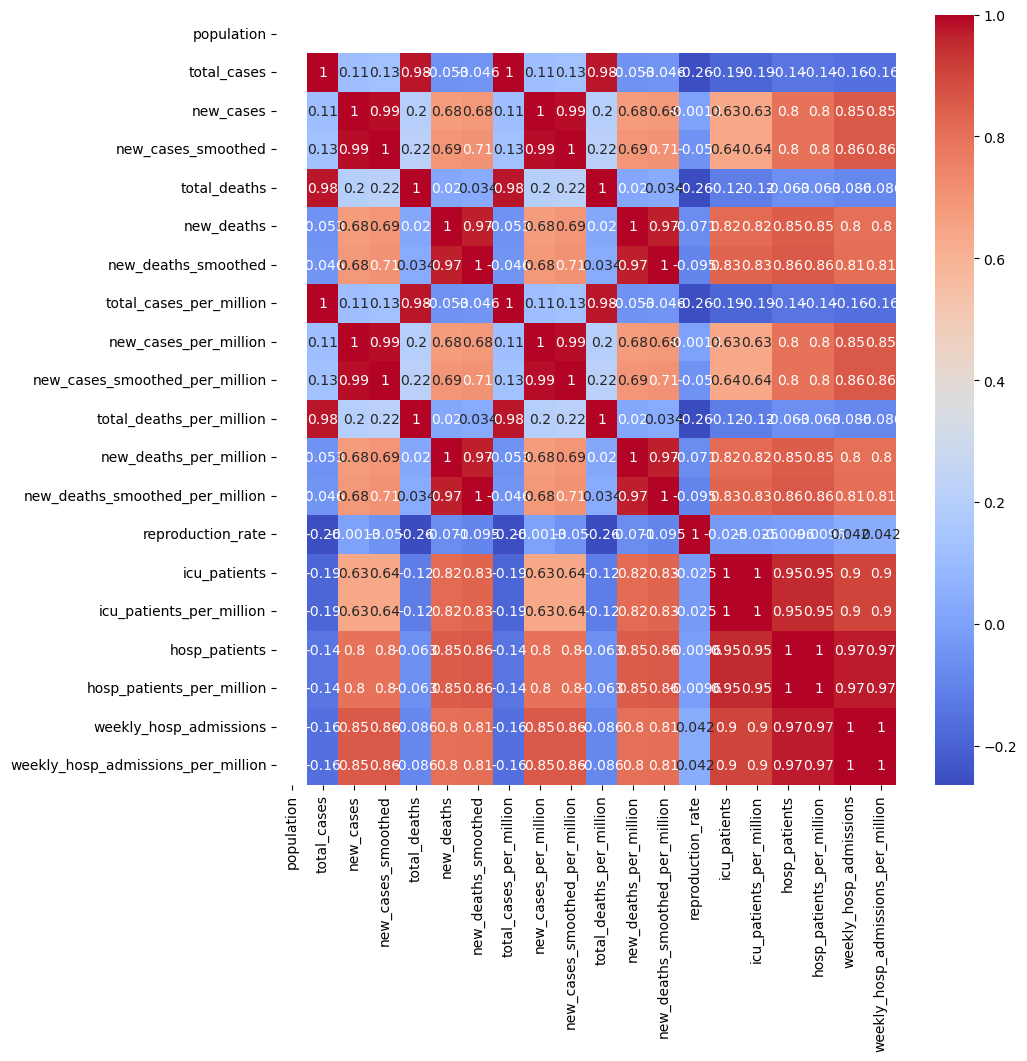

In [52]:
# Heatmap Correlation
plt.figure(figsize=(10,10))
CovidDeathsClean2 = CovidDeathsClean.iloc[:, 1:]
sns.heatmap(CovidDeathsClean2.corr(), annot=True, cmap='coolwarm')
#Annot is to add the annotation from correlation matrix
#cmap - color map

# To select only features with <-0.2 and >0.2


In [53]:
#choose one diagnosis only since the outcome will be same
CovidDeathsClean3 = CovidDeathsClean2.loc[:, ~CovidDeathsClean2.corrwith(CovidDeathsClean2['total_deaths']).between(-.2, .2)]
len(CovidDeathsClean3.columns)

10

# Checking for outlier

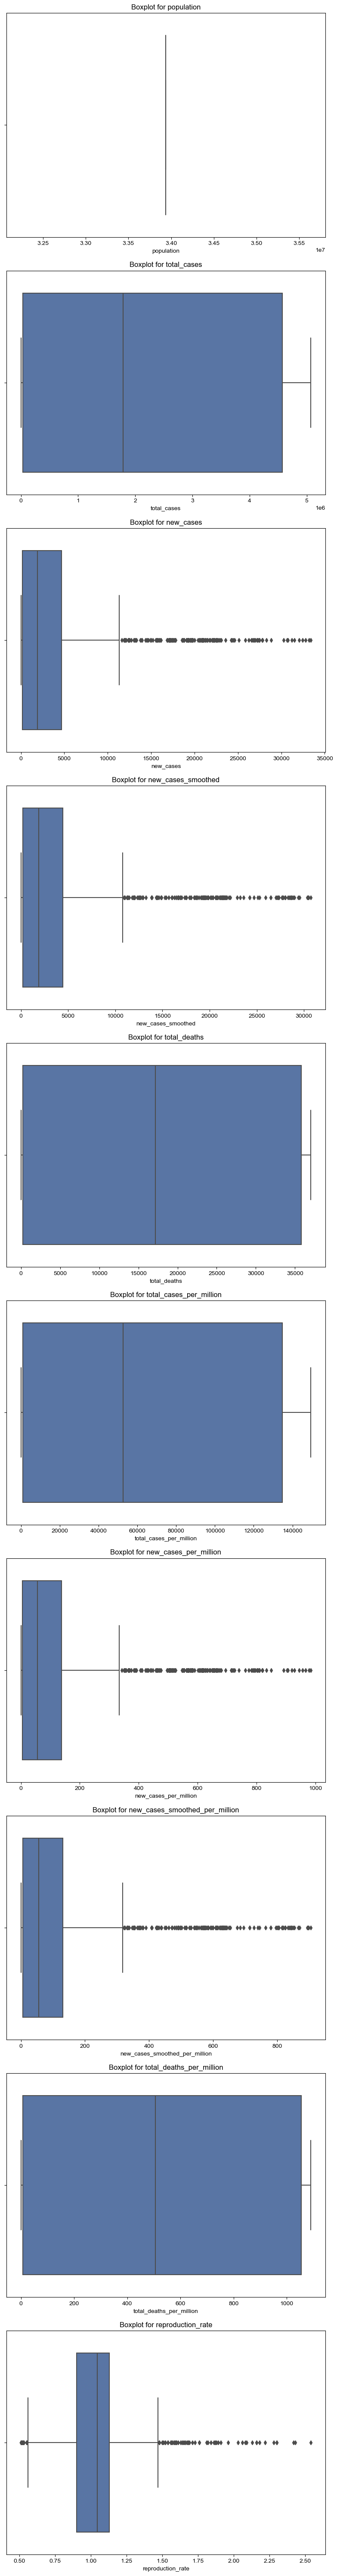

In [54]:
# Plotting Distribution Graph
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, for better styling

columns_to_plot = CovidDeathsClean3.columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 6*len(columns_to_plot)))

# Use seaborn for better styling (optional)
sns.set(style="whitegrid")

# Create boxplots for each column
for i, column_name in enumerate(columns_to_plot):
    sns.boxplot(x=CovidDeathsNew[column_name], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column_name}')
    axes[i].set_xlabel(column_name)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Some attributes have outliers but there are natural outlier which deleteing them will affect the model. So, we go through with outliers first.

In [55]:
#Removing Outliers using Quantile Method. Get the 99th percentile and keep the data below it

#q = data_clean['Price'].quantile(0.99)
#data_clean = data_clean[data_clean['Price']<q]
#data_clean.describe(include='all')

In [56]:
CovidDeathsClean3

,population,total_cases,new_cases,new_cases_smoothed,total_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,reproduction_rate
0,33938216,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0.000,1.044208
1,33938216,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0.000,1.044208
2,33938216,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0.000,1.044208
3,33938216,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0.000,1.044208
4,33938216,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0.000,1.044208
...,...,...,...,...,...,...,...,...,...,...
1212,33938216,5066877.0,0.0,688.143,37011.0,149297.093,0.000,20.276,1090.541,1.044208
1213,33938216,5071694.0,4817.0,688.143,37020.0,149439.028,141.934,20.276,1090.806,1.044208
1214,33938216,5071840.0,146.0,709.000,37020.0,149443.330,4.302,20.891,1090.806,1.044208
1215,33938216,5071840.0,0.0,0.000,37020.0,149443.330,0.000,0.000,1090.806,1.044208


# Data Normalization

In [57]:
X_attribute = ['population', 'total_cases', 'new_cases', 'new_cases_smoothed',
               'total_cases_per_million', 'new_cases_per_million',
               'new_cases_smoothed_per_million', 'total_deaths_per_million',
               'reproduction_rate']

X = CovidDeathsClean3.loc[:, X_attribute].values
y = CovidDeathsClean3.loc[:, 'total_deaths'].values

original_shape_x = X.shape
original_shape_y = y.shape



In [58]:
print(X.shape)
print(y.shape)

(1217, 9)
(1217,)


In [59]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

X = X.reshape(-1, 1)  # Reshape X to have one column
y = y.reshape(-1, 1)  # Reshape y to have one column

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()


# Fit and transform X and Y
normalized_x = scaler_x.fit_transform(X)
normalized_y = scaler_y.fit_transform(y)

print("Normalized X shape:", normalized_x.shape)
print("Normalized Y shape:", normalized_y.shape)



Normalized X shape: (10953, 1)
Normalized Y shape: (1217, 1)


In [60]:
normalized_x = X.reshape(original_shape_x)
normalized_y = y.reshape(original_shape_y)
print("Normalized X shape:", normalized_x.shape)
print("Normalized Y shape:", normalized_y.shape)
print("Normalized X:", normalized_x)
print("Normalized Y:", normalized_y)

Normalized X shape: (1217, 9)
Normalized Y shape: (1217,)
Normalized X: [[3.39382160e+07 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.04420797e+00]
 [3.39382160e+07 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.04420797e+00]
 [3.39382160e+07 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.04420797e+00]
 ...
 [3.39382160e+07 5.07184000e+06 1.46000000e+02 ... 2.08910000e+01
  1.09080600e+03 1.04420797e+00]
 [3.39382160e+07 5.07184000e+06 0.00000000e+00 ... 0.00000000e+00
  1.09080600e+03 1.04420797e+00]
 [3.39382160e+07 5.07184000e+06 0.00000000e+00 ... 0.00000000e+00
  1.09080600e+03 1.04420797e+00]]
Normalized Y: [    0.     0.     0. ... 37020. 37020. 37020.]


# Data Partitioning

In [61]:
# data partitioning (80:20) Training =80%, Testing =20%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_x, normalized_y, test_size = 0.2, random_state=42) #random_state=0, Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls

In [62]:
X_train


array([[3.39382160e+07, 3.17717000e+05, 1.44800000e+03, ...,
        4.98260000e+01, 3.49460000e+01, 8.00000000e-01],
       [3.39382160e+07, 1.28130000e+04, 4.32000000e+02, ...,
        7.48800000e+00, 4.03700000e+00, 1.84000000e+00],
       [3.39382160e+07, 2.73524100e+06, 3.52800000e+03, ...,
        9.88220000e+01, 9.22500000e+02, 8.80000000e-01],
       ...,
       [3.39382160e+07, 5.03817000e+06, 1.75000000e+02, ...,
        7.69500000e+00, 1.08856600e+03, 1.04420797e+00],
       [3.39382160e+07, 4.47047100e+06, 3.41000000e+03, ...,
        6.88560000e+01, 1.04902400e+03, 9.10000000e-01],
       [3.39382160e+07, 5.03724200e+06, 3.24000000e+02, ...,
        7.85000000e+00, 1.08850700e+03, 1.04420797e+00]])

# Develop Multiple Linear Regression model 

In [63]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred=regressor.predict(X_test)
y_pred

array([ 4.94398313e+03,  1.28013549e+02,  1.37529842e-04,  3.63869936e+04,
        1.09609908e+04,  2.81993412e+02,  2.82340163e+04,  3.70110154e+04,
        1.24009915e+02,  1.16001438e+02,  6.50300198e+03,  9.82987761e+02,
        3.63849927e+04,  1.69999868e+03,  3.67130064e+04,  3.53599022e+03,
        5.10800689e+03,  5.76800223e+03,  1.15899027e+03,  1.12101371e+03,
        3.17229999e+04,  1.28798862e+03,  3.69569866e+04,  1.13000775e+03,
        2.36006606e+02,  3.69080136e+04,  4.31998770e+02,  2.78580145e+04,
        3.70110154e+04,  3.70110154e+04,  4.34799456e+03,  8.80022678e+01,
        1.21800906e+03,  3.69669991e+04,  3.57319861e+04,  4.00126652e+00,
        3.68409863e+04,  3.10730160e+04,  1.99876254e+00,  3.20989976e+04,
       -5.33060721e-04,  3.69080141e+04,  3.56120158e+04,  9.60116855e+01,
        3.65229851e+04,  1.33001585e+02,  1.05099872e+03,  1.72199091e+03,
        2.71909949e+04,  5.20985437e+02,  3.18089988e+04,  1.24994696e+02,
        1.22008132e+02,  

Making table for actual value and the predicted value

In [65]:
table = list(zip(y_test,y_pred))
regressor_diff = pd.DataFrame(table, columns = ['Actual Values', 'Predicted Values'] )
regressor_diff


,Actual Values,Predicted Values
0,4944.0,4943.983131
1,128.0,128.013549
2,0.0,0.000138
3,36387.0,36386.993633
4,10961.0,10960.990762
...,...,...
239,1100.0,1100.005642
240,128.0,128.011671
241,0.0,0.000631
242,36753.0,36752.983585


In [66]:
import statsmodels.formula.api as sm
result = sm.ols("total_deaths~population+total_cases+new_cases+new_cases_smoothed+total_cases_per_million+new_cases_per_million+new_cases_smoothed_per_million+total_deaths_per_million+reproduction_rate", data=CovidDeathsClean3).fit()

#print result.summary()
print (round(result.rsquared,4), round(result.rsquared_adj,4)) # If you're developing MLR, take rsquared_adj.

1.0 1.0


In [67]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 0.007879735163181642
Mean Square Error: 8.754462444163193e-05
Root Mean Square Error: 0.00935652843963144


In [68]:
regressor_diff.to_csv ('regressor_diff.csv', index=None)
regressor_diff = pd.read_csv('regressor_diff.csv')